In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from scipy.stats import skew,kurtosis,normaltest,ttest_ind,zscore

# Data cleaning

Train data:

In [3]:
#load the csv file into pandas dataframe
train_data = pd.read_csv('train.csv')

#display first few rows of dataframe
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Cleaning and Analysis:

In [3]:
#identify missing values
#The result (missing_values) where the index:column names, and values: the count of missing values in each column
missing_values = train_data.isnull().sum()#to count nbr of missing values(true when isnull)
percentage_missing = (missing_values/len(train_data))*100

#determine columns with highest percentage of missing values
max_missing_col = percentage_missing.idxmax()#returns the index(column name) where the maximum value in the percentage missing
max_missing_percentage = percentage_missing.max()# returns the maximum percentage of missing values in any column

print('Missing values: \n',missing_values,'\n')
print('percentage of missing values: \n',percentage_missing ,'\n')
print('Maximum missing column: ',max_missing_col)
print('Percentage of missing values in maximum missing column: ',max_missing_percentage,'%')

Missing values: 
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64 

percentage of missing values: 
 Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64 

Maximum missing column:  PoolQC
Percentage of missing values in maximum missing column:  99.52054794520548 %


In [9]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the numerical columns in the train_dataset
train_data_numeric_imputed = pd.DataFrame(imputer.fit_transform(train_data.select_dtypes(include='number')),
                                              columns=train_data.select_dtypes(include='number').columns)

# Display the imputed DataFrame
#print(train_dataset_numeric_imputed)
train_data_numeric_imputed.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,730.5,56.89726,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
1,730.5,56.89726,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
2,730.5,56.89726,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
3,730.5,56.89726,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
4,730.5,56.89726,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
5,730.5,56.89726,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
6,730.5,56.89726,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
7,730.5,56.89726,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
8,730.5,56.89726,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
9,730.5,56.89726,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589


In [10]:
# Create a SimpleImputer with strategy='most_frequent' for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Identify and select only the categorical columns
categorical_columns = train_data.select_dtypes(include='object').columns

# Fit and transform the imputer on the categorical columns
train_data_categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(train_data[categorical_columns]),
                                               columns=categorical_columns)

print(train_data_categorical_imputed)

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave  Grvl      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave  Grvl      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave  Grvl      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave  Grvl      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
2915       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
2916       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
2917       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
2918       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
2919       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition

In [12]:
# Combine the imputed categorical columns with the original numerical columns
train_data = pd.concat([train_data_categorical_imputed, train_data_numeric_imputed], axis=1)
train_data.head(10)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
5,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
6,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
7,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
8,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589
9,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.19589


In [6]:
#descriptive statistics
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#correlation between numerical features and target variable 'SalePrice'
#numeric columns to avoid could not convert string to float error
numeric_columns = train_data.select_dtypes(include=[np.number])#filter only the numeric columns in the DataFrame
correlation_with_saleprice = numeric_columns.corr()['SalePrice'].sort_values(ascending=False)

print(correlation_with_saleprice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:
# imposrting the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Calculate z-scores for 'SalePrice'
z_scores = zscore(train_data['SalePrice'])

# Define a threshold for outlier removal (e.g., 3 standard deviations)
outlier_threshold = 3

# Remove rows where 'SalePrice' is beyond the threshold
df_no_outliers = train_data[abs(z_scores) < outlier_threshold]

# Display the DataFrame with outliers removed
print("\nDataFrame with Outliers Removed:")
print(df_no_outliers)


DataFrame with Outliers Removed:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave     0      Reg   
1        2          20       RL         80.0     9600   Pave     0      Reg   
2        3          60       RL         68.0    11250   Pave     0      IR1   
3        4          70       RL         60.0     9550   Pave     0      IR1   
4        5          60       RL         84.0    14260   Pave     0      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave     0      Reg   
1456  1457          20       RL         85.0    13175   Pave     0      Reg   
1457  1458          70       RL         66.0     9042   Pave     0      Reg   
1458  1459          20       RL         68.0     9717   Pave     0      Reg   
1459  1460          20       RL         75.0     9937   Pave     0      Reg   

     LandContour 

In [9]:
# Test if 'SalePrice' follows a normal distribution using the Shapiro-Wilk test
print('Skewness: ',skew(train_data['SalePrice']))
print('Kurt: ',kurtosis(train_data['SalePrice']))
print(normaltest(train_data['SalePrice']))

Skewness:  1.880940746034036
Kurt:  6.509812011089439
NormaltestResult(statistic=610.8359109472653, pvalue=2.283848353787728e-133)


In [10]:
#differences between the means of 'OverallQual' for houses with and without 'CentralAir' using a suitable statistical test
with_central_air = train_data[train_data['CentralAir'] == 'Y']['OverallQual']
without_central_air = train_data[train_data['CentralAir'] == 'N']['OverallQual']

# Perform a two-sample t-test
# ttest_ind function from scipy.stats to perform a two-sample t-test
#(with & without centralAir)determine whether there is a significant difference between them
#equal_var=False when assuming unequal variances between the two groups
statistic, p_value = ttest_ind(with_central_air, without_central_air, equal_var=False)
print("Two-Sample t-Test Results:")
print(f"P-value: {p_value}")

if p_value < 0.05:#a common significance level
    print("There is a significant difference in 'OverallQual' between houses with and without CentralAir.")
else:
    print("There is no significant difference in 'OverallQual' between houses with and without CentralAir.")

Two-Sample t-Test Results:
P-value: 4.063128934329299e-19
There is a significant difference in 'OverallQual' between houses with and without CentralAir.


## Visualization: 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Train data:

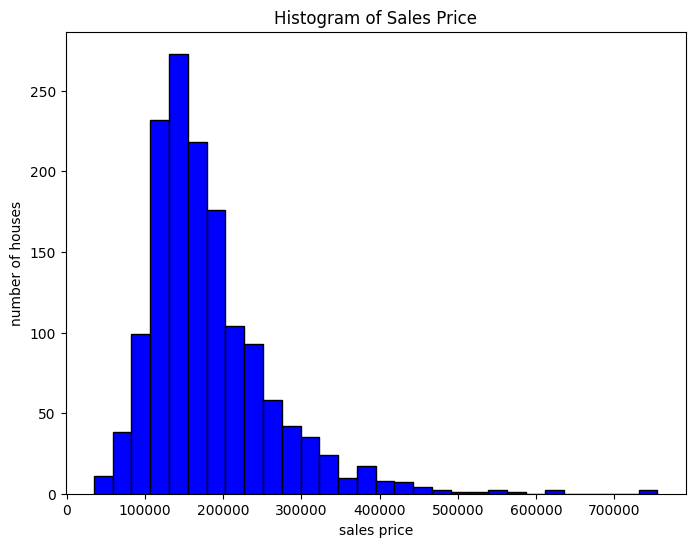

In [16]:
# Plotting a histogram of Sales Prices
plt.figure(figsize=(8,6))
plt.hist(train_data['SalePrice'],bins=30, color= 'blue',edgecolor='black')
plt.title('Histogram of Sales Price')
plt.xlabel('sales price')
plt.ylabel('number of houses')
plt.show()

Highest number of houses has an average of 150000 price

<Axes: >

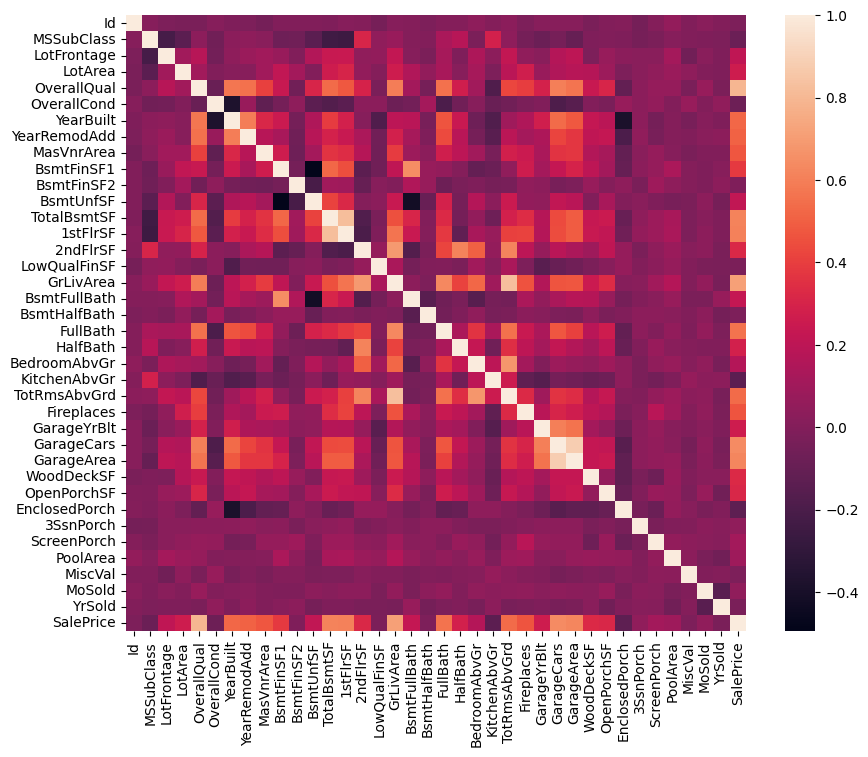

In [17]:
# Plotting a correlation matrix heatmap for numerical features
corr_matrix=train_data.select_dtypes('number').corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)

Highly correlated with saleprice: 
overallqual/totalbsmtsf/1stflrsf/grlivarea/garagecars/garagearea

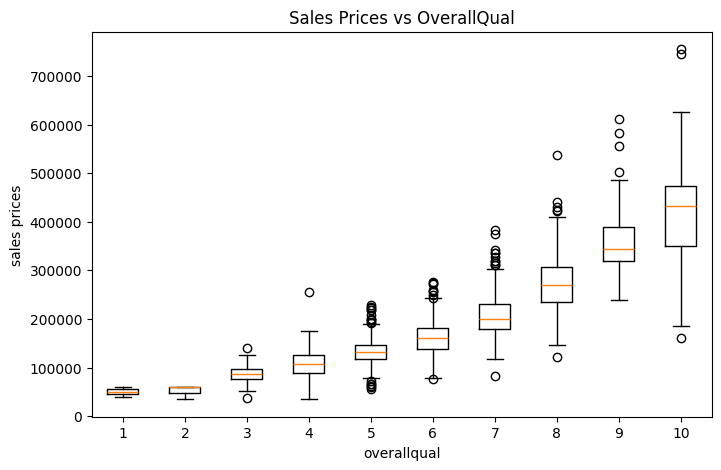

In [18]:
#Creating a box plot for 'SalePrice' against 'OverallQual'
plt.figure(figsize=(8,5))
plt.boxplot(train_data.groupby('OverallQual')['SalePrice'].apply(list))
plt.title('Sales Prices vs OverallQual')
plt.ylabel('sales prices')
plt.xlabel('overallqual')

plt.show()

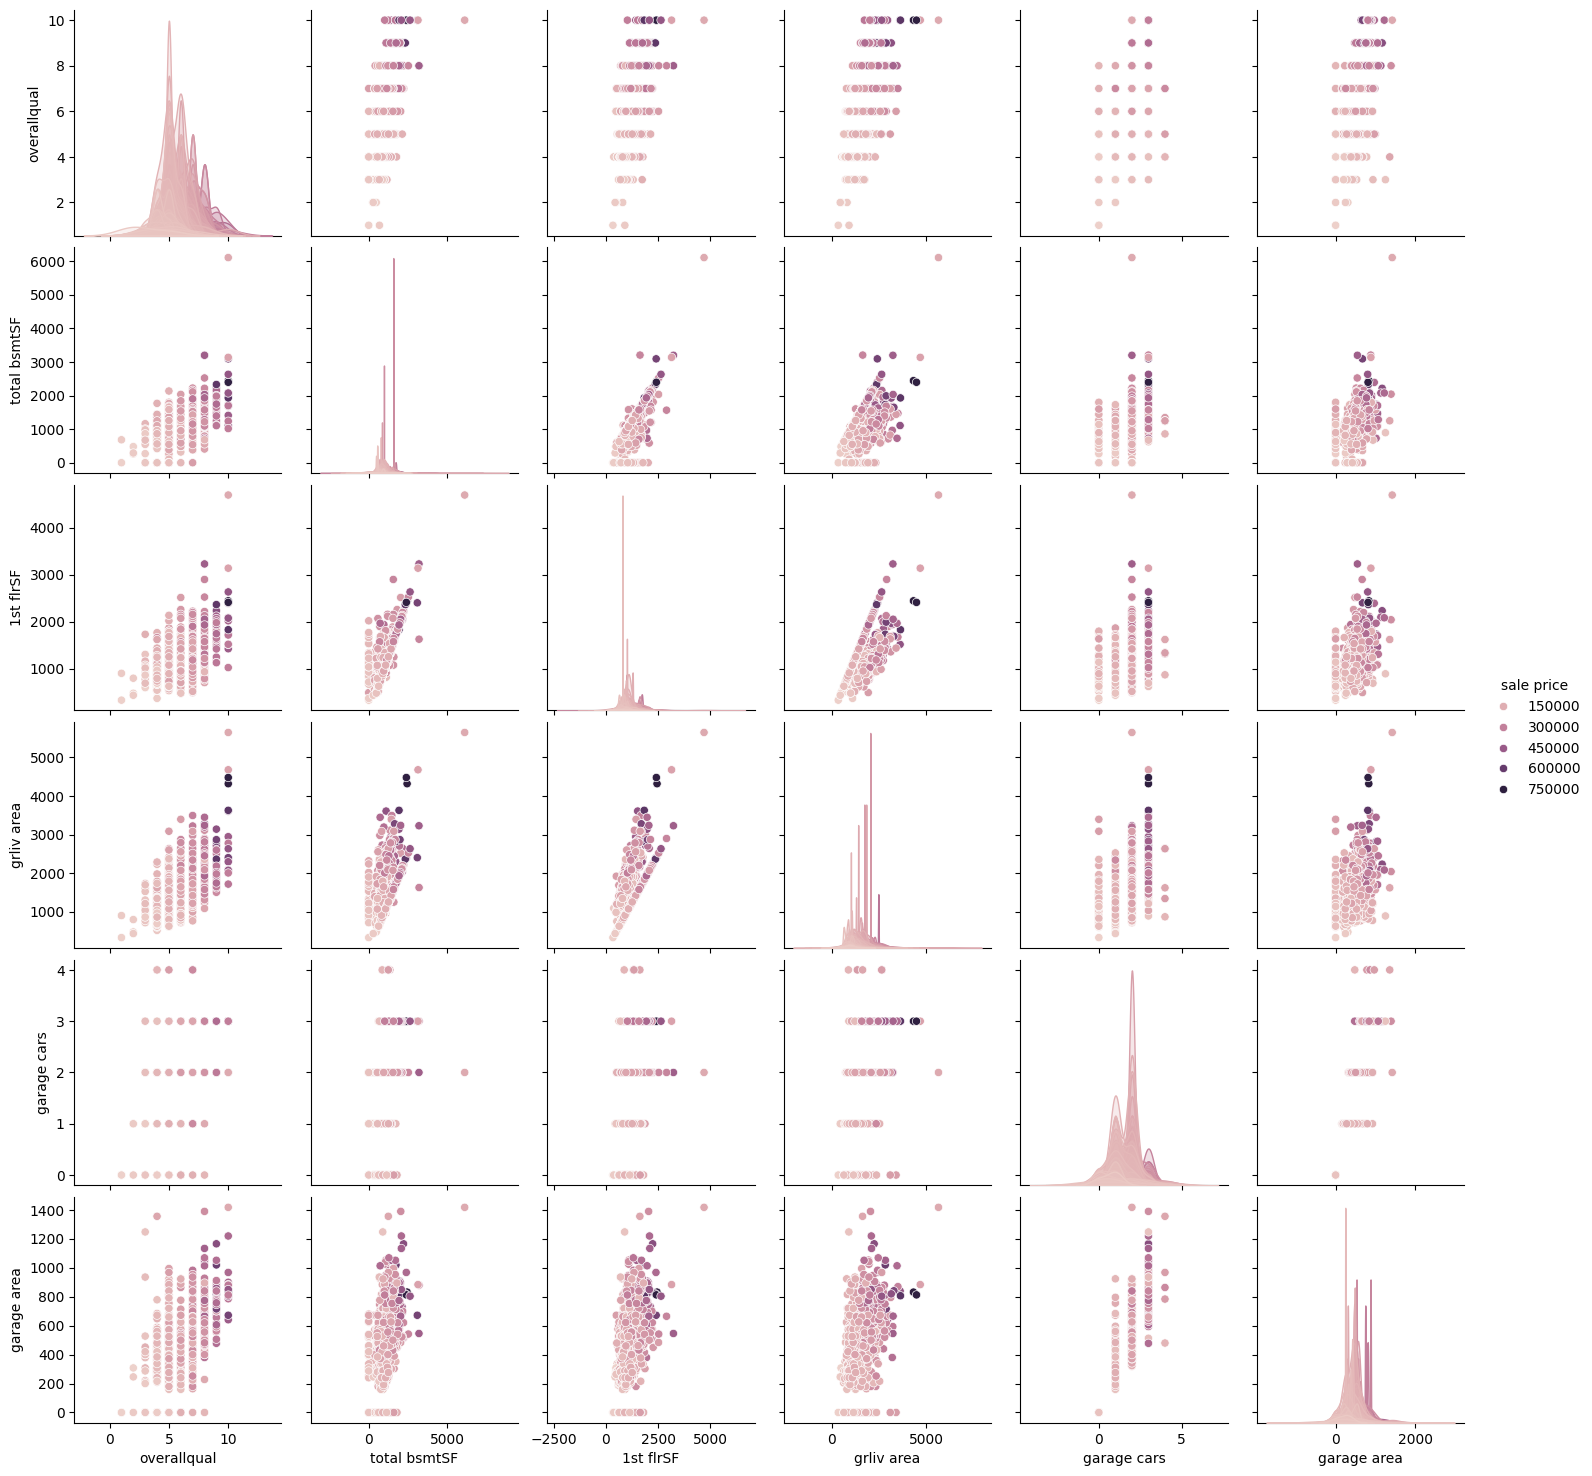

In [22]:

data= pd.DataFrame({'sale price':train_data['SalePrice'], 'overallqual': train_data['OverallQual'],'total bsmtSF':train_data['TotalBsmtSF'],'1st flrSF':train_data['1stFlrSF'],'grliv area':train_data['GrLivArea'],'garage cars':train_data['GarageCars'],'garage area':train_data['GarageArea']})
sns.pairplot(data,hue='sale price')
plt.show()


In [1]:
# imposrting the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Overview of the data

In [4]:
# Loading the dataset 
dataset = pd.read_csv('train.csv')
# take a look at the contents
dataset.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


## Splitting the dataset to dependant and independant variables

In [5]:
# independant variables: all the columns except the salesprice
x = dataset.drop('SalePrice', axis=1)
# dependant variable: the SalePrice column
y = dataset['SalePrice']

### New Features

In [6]:
# calculating the whole area of the house
dataset['house_area']=dataset['1stFlrSF']+dataset['2ndFlrSF']
# calculating the finished square feet of the house 
dataset['finshedBasement']= dataset['TotalBsmtSF']-dataset['BsmtUnfSF']
# display dataset with new features
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,house_area,finshedBasement
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1710,706
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1262,978
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1786,486
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1717,216
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,2198,655


## Train/Test split 

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

## Encoding, Scaling and Imputing
<b>Imputing missing values:</b> 
* for <i>Numerical</i> values: replace the missing values by the mean<br>
<b>why the <i>mean</i>?</b> because if we replace them by 0 for example (which is a min value) it would have a significant effect on the analysis, however the mean value makes it as signifacnt as a lot of the other values and thus not afecting my prediction either way.
* for <i>Categorical</i> values: replace the missing values by the most frequent
<h3> Numerical values: Scaling </h3>
<u>StandardScaler():</u> <br>
- less sensitive to outliers<br>
- isn't influenced by the global max and min<br>
- scales features by removing the mean and scaling to unit variance. This results in a transformation where the mean of the rescaled features becomes 0 with a standard deviation of 1.
<h3> Categorical values: Encoding</h3>
<u>OneHotEncoder()</u>
handle_unknown: to ignore to skip previously unseen labels.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Create 2 pipleines: one to deal with numeric feature and the other to deal with the categorical features 
# numeric values pipeline
numeric_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # imputing the missing values with the mean
    ('scaler', StandardScaler())  # scaling the data using the standard scaler
])
# categorical values pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder:', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

Testing the pipelines

In [9]:
# transform the data with the pipelines
# numerical:
numeric_pipeline.fit_transform(x_train.select_dtypes(include='number'))

array([[-0.15128053,  0.07201912,  0.        , ..., -0.0940347 ,
         0.64549248, -0.6066712 ],
       [-1.20406583,  0.07201912,  0.52005553, ..., -0.0940347 ,
        -0.10097803, -0.6066712 ],
       [-1.37394709, -0.16426833, -0.45034645, ..., -0.0940347 ,
        -0.84744854,  0.14875733],
       ...,
       [-0.69442203, -0.16426833, -0.14158218, ...,  1.35270064,
         0.64549248,  0.90418586],
       [-1.32848591, -0.87313067, -1.0237658 , ..., -0.0940347 ,
         1.76519824,  0.14875733],
       [ 0.99721253, -0.87313067,  0.        , ..., -0.0940347 ,
        -0.47421329, -1.36209973]])

In [10]:
# categorical
categorical_pipeline.fit_transform(x_train.select_dtypes(exclude='number'))

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [9]:
# combining the two pipelines into one using the column transformer 
from sklearn.compose import ColumnTransformer

full_pipe_preprocessing = ColumnTransformer([
    ('numeric pipe', numeric_pipeline, x.select_dtypes(include='number').columns.tolist()),
    ('categorical pipe', categorical_pipeline, x.select_dtypes(exclude='number').columns.tolist())
])

try the full preprocessing pipeline

In [12]:
# transform the data
full_pipe_preprocessing.fit_transform(x_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.15128053,  0.07201912,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.20406583,  0.07201912,  0.52005553, ...,  0.        ,
         0.        ,  0.        ],
       [-1.37394709, -0.16426833, -0.45034645, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.69442203, -0.16426833, -0.14158218, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32848591, -0.87313067, -1.0237658 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.99721253, -0.87313067,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

# Modeling the data
## Linear Regression:
to predict the SalePrice Column which is a continuous numerical value

In [14]:
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('preprocessing', full_pipe_preprocessing),
    ('model', LinearRegression())
])

In [15]:
# fit the model to the training data 
pipe.fit(x_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFin...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model', LinearRegression())])

### I. Multiple linear Regression using all the attributes

In [16]:
# make prediction 
y_hat = pipe.predict(x_test)  # predicted values

<h4><u>Measure accuracy</u></h4>
by calculating the <b>Mean Squared Error</b> and the <b>Variance Score</b>

In [17]:
# Calculate the MSE 
print('MSE: ', np.mean((y_hat-y_test)**2))

# variance score

print('Variation Score = ', pipe.score(x_test,y_test))
# if it's 1 then the prediction is perfect

MSE:  1.2360789372990852e+28
Variation Score =  -2.2263616625527693e+18


This model is of course highly inaccurate as it uses all feature whether they are important or not 

### II. Simple linear regression using the most correlated feature
Which is <i>OverallQual</i>, the most correlated feature with SalePrice

In [18]:
# independant variable - Overall Quality
x= dataset['OverallQual']
# dependant variable - Sale price 
y= dataset['SalePrice']

# Train/test split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

# Create a pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
# reshape features and convert them to arrays 
x_train= np.asanyarray(x_train).reshape(-1, 1)
x_test= np.asanyarray(x_test).reshape(-1, 1)
y_train= np.asanyarray(y_train).reshape(-1, 1)
y_test= np.asanyarray(y_test).reshape(-1, 1)

# fit the model to the data 
pipe.fit(x_train, y_train)

# make the prediction 
y_hat = pipe.predict(x_test)

# measure accuracy 
# Calculate the MSE 
print('MSE: ', np.mean((y_hat-y_test)**2))
# variance score
print('Variation Score = ', pipe.score(x_test,y_test))
# if it's 1 then the prediction is perfect


MSE:  1941192168.6942506
Variation Score =  0.6503624733326532


These prediction are good however they're not accourate enough to use 
Compared the first model, yes the error is reduced by a lot and the score is much better however we need it to cross well into the 80~85% accuracy or possibly more

## Feature Extraction
We need to apply a <b>MultipleLinearRegression()</b> model that uses the most significant features and produces around 80 to 85% accuracy


### Multiple linear regression using the 5 most correlated features with SalePrice
    OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF

In [19]:
import warnings
warnings.filterwarnings('ignore')

# independant variable - Overall Quality
x= dataset[['OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
# dependant variable - Sale price 
y= dataset['SalePrice']

# Train/test split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)
pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())  # using the lasso model on the dataset
])
pipe

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [20]:
# fit the model 
pipe.fit(x_train, y_train)
# predict the saleprice
y_hat = pipe.predict(x_test)

In [21]:
# measure accuracy
# Calculate the MSE 
print('MSE: ', np.mean((y_hat-y_test)**2))

# variance score

print('Variation Score = ', pipe.score(x_test,y_test))
# if it's 1 then the prediction is perfect

MSE:  1106196834.3397107
Variation Score =  0.8007575285933973


### Lasso model:
    Lasso regression will automatically select those features that are useful, discarding the useless or redundant features. In Lasso regression, discarding a feature will make its coefficient equal to 0.

In [10]:
from sklearn.linear_model import  Lasso

import warnings
warnings.filterwarnings('ignore')

# independant variables: all the columns except the salesprice
x = dataset.drop('SalePrice', axis=1)
# dependant variable: the SalePrice column
y = dataset['SalePrice']

# preprocessing pipeline on all features
x= full_pipe_preprocessing.fit_transform(x)  

# applying train/test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

# creating the lasso model
lasso_model = Lasso()  

# fit the model 
lasso_model.fit(x_train, y_train)
# predict the saleprice
y_hat = lasso_model.predict(x_test)

# measure accuracy
# Calculate the MSE 
print('MSE: ', np.mean((y_hat-y_test)**2))

# variance score

print('Variation Score = ', lasso_model.score(x_test,y_test))
# if it's 1 then the prediction is perfect


MSE:  660054827.4350325
Variation Score =  0.881114327035194


### Visualization of thefeature scoring of Lasso regression

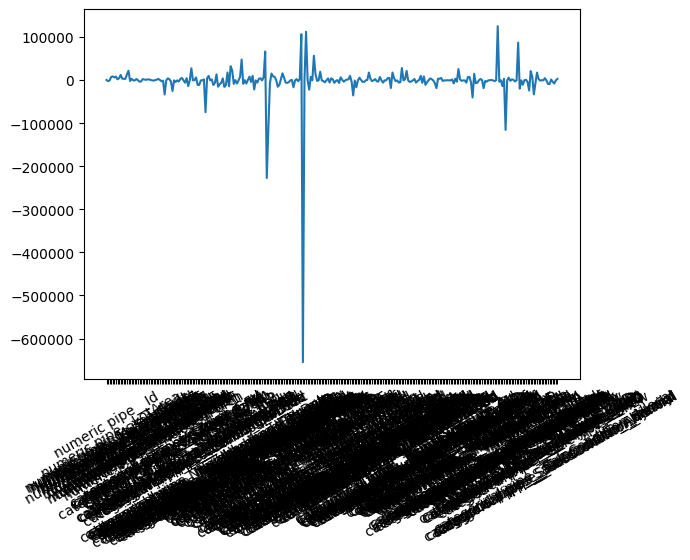

In [14]:
coefficients = lasso_model.coef_

# Check if get_feature_names_out is an attribute or method
if hasattr(full_pipe_preprocessing, 'get_feature_names_out'):
    feature_names = full_pipe_preprocessing.get_feature_names_out()
else:
    # If get_feature_names_out is not a method but an attribute
    feature_names = full_pipe_preprocessing.get_feature_names_out

# better looked at in 10s
plt.xticks(rotation=30)
plt.plot(feature_names[:], coefficients[:])
plt.show()

### Get the 5 highest scoring features

In [39]:
# Get indices of top 5 coefficients (absolute values)
top_5_indices = np.argsort(np.abs(coefficients))[-5:]

# Extract top 5 feature names based on the indices
top_5_feature_names = feature_names[top_5_indices]

print("Top 5 feature names with highest coefficients:")
print(top_5_feature_names)

Top 5 feature names with highest coefficients:
['categorical pipe__RoofMatl_Membran' 'categorical pipe__GarageCond_Ex'
 'categorical pipe__GarageQual_Ex' 'categorical pipe__Condition2_PosN'
 'categorical pipe__RoofMatl_ClyTile']


Lasso Regression Produced a more accurate prediction of the data because it removed unnecessary variables thus producing an accuracy of 88%